In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_inf = float("-inf")
class Subcampaign:
    def __init__(self, bid, min_budget, max_budget, number_of_clicks):
        self.bid = bid
        self.min_budget = min_budget
        self.max_budget = max_budget
        self.number_of_clicks = number_of_clicks #function
    
    # x is budget
    def n(self,x):
        if x < self.min_budget:
            return n_inf
        elif x < self.bid:
            return 0
        elif x > self.max_budget:
            return n_inf
        else:
            return self.number_of_clicks(x)

In [3]:
def n1(x):
    return x * 2
def n2(x):
    return x * 3
def n3(x):
    return x
def n4(x):
    return x * 4
def n5(x):
    return x * 7

# Init of subcampaigns

In [4]:
subcampaigns = np.array([])
subcampaigns = np.append(subcampaigns, Subcampaign(2, 0, 50, n1))
subcampaigns = np.append(subcampaigns, Subcampaign(1, 0, 20, n2))
subcampaigns = np.append(subcampaigns, Subcampaign(0.5, 0, 30, n3))
subcampaigns = np.append(subcampaigns, Subcampaign(0.5, 0, 40, n4))
subcampaigns = np.append(subcampaigns, Subcampaign(1, 0, 30, n5))

# Init budget possible values

In [5]:
budgets = np.linspace(0.0, 50.0, 11)

# First step: choice of bid
Being that we have only one bid for each subcampaign, it is not necessary. I just fill the table with the resulting values

In [6]:
init_table = np.zeros(shape=(len(subcampaigns),len(budgets)))
index_s = 0
for s in subcampaigns:
    row = []
    for b in budgets:
        row.append(s.n(b))
    init_table[index_s]=row
    index_s = index_s+1

In [7]:
print(init_table)

[[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [  0.  15.  30.  45.  60. -inf -inf -inf -inf -inf -inf]
 [  0.   5.  10.  15.  20.  25.  30. -inf -inf -inf -inf]
 [  0.  20.  40.  60.  80. 100. 120. 140. 160. -inf -inf]
 [  0.  35.  70. 105. 140. 175. 210. -inf -inf -inf -inf]]


# Second step: instance budget for each subcampaign

In [8]:
table_result = np.array([])
previous_row = np.zeros(len(budgets))
# considero budget b. Per quell'iterazione, considero tutti i budget della subcampaign b_s s.t. b >= budget(previous_row) + budget(subcampaign)
index_s = 0
for s in subcampaigns:
    index_b = 0
    results = np.array([])  # array representing solution when adding subcampaign s
    for b in budgets:
        # when I am in subcampaign s, I have previous row containing the best allocation for each budget value
        # fill array of choices of budget for pair (s, b). A choice is to be considered if budget
        choices = np.array([])
        # selezionare gli indici di previous_row che sono sotto a budget
        filtered_choices_pr = previous_row[0:index_b+1]#lista temporanea contenente i casi di previous_row che sono associati ad un budget complementare
        # selezionare per ogni valore di filtered_choices_pr l'associato della riga della subcampaign
        for i in range(0, len(filtered_choices_pr)):
            num_click_pr = previous_row[i]
            # find index for associated complementary budget
            j = np.where(budgets+budgets[i] == b)
            j = j[0][0]
            current_num_click_s = init_table[index_s][j]
            choices = np.append(choices, current_num_click_s + num_click_pr)
        
        # find maximum
        max_val = np.amax(choices)
        results = np.append(results, max_val)                
        index_b = index_b + 1
        
    #table_result = np.put(table_result, index_s, results)
    table_result = np.concatenate((table_result, results), axis=0)
    index_s = index_s + 1

table_result = table_result.reshape(len(subcampaigns), len(budgets))

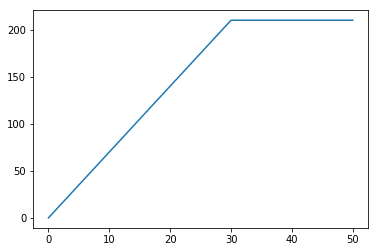

In [9]:
plt.plot(budgets, table_result[-1])